In [1]:
import os
from collections import defaultdict
import re

# Path to the directory containing the image files
directory = '/kaggle/input/aic-frames/output'

# Dictionary to store the count of files by prefix
file_count = defaultdict(int)

# Regular expression to match prefixes that start with 'L' followed by two digits
prefix_pattern = re.compile(r'^L\d{2}')

# Iterate through the files in the directory
for filename in os.listdir(directory):
    match = prefix_pattern.match(filename)
    if match:
        prefix = match.group()  # Extract the matched prefix (e.g., L01, L02, etc.)
        file_count[prefix] += 1

# Display the count of files for each prefix
for prefix, count in sorted(file_count.items()):
    print(f"{prefix}: {count} files")


L01: 13474 files
L02: 14295 files
L03: 13637 files
L04: 14543 files
L05: 14568 files
L06: 16570 files
L07: 14373 files
L08: 15687 files
L09: 15793 files
L10: 16553 files
L11: 14363 files
L12: 16229 files
L13: 14673 files
L14: 14663 files
L15: 13911 files
L16: 15805 files
L17: 12854 files
L18: 16108 files
L19: 13531 files
L20: 14481 files
L21: 13506 files
L22: 16065 files
L23: 8518 files
L24: 8725 files


In [2]:
# # Copy image_metadata.csv
# !cp /kaggle/input/vectordb-blip2-1/image_metadata.csv /kaggle/working/

# # Copy vector_database.usearch
# !cp /kaggle/input/vectordb-blip2-1/vector_database.usearch /kaggle/working/

In [3]:
!pip install salesforce-lavis
!pip install usearch
!pip install ace_tools

  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.4/235.4 kB 7.5 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... - \ | done
  Preparing metadata (pyproject.toml) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━

In [4]:
import os
from PIL import Image
import torch
from lavis.models import load_model_and_preprocess
import numpy as np
import pandas as pd
from tqdm import tqdm
import usearch
from usearch.index import Index

# Thiết lập thiết bị và số lượng GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_gpu = torch.cuda.device_count()

# Load mô hình và preprocessors
model, vis_processors, txt_processors = load_model_and_preprocess(
    "blip2_feature_extractor", "coco", device=device, is_eval=True
)

model = model.to(device)
# model = torch.nn.DataParallel(model)

/opt/conda/lib/python3.10/site-packages/fairscale/experimental/nn/offload.py:19: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  return torch.cuda.amp.custom_fwd(orig_func)  # type: ignore
/opt/conda/lib/python3.10/site-packages/fairscale/experimental/nn/offload.py:30: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  return torch.cuda.amp.custom_bwd(orig_func)  # type: ignore
/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

100%|██████████| 1.89G/1.89G [00:10<00:00, 186MB/s]
/opt/conda/lib/python3.10/site-packages/lavis/models/eva_vit.py:433: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_

Position interpolate from 16x16 to 26x26


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

100%|██████████| 4.37G/4.37G [00:14<00:00, 328MB/s]
/opt/conda/lib/python3.10/site-packages/lavis/models/base_model.py:40: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  chec

In [5]:
import os
from PIL import Image
import torch
from lavis.models import load_model_and_preprocess
import numpy as np
import pandas as pd
from tqdm import tqdm
import random
import usearch
from usearch.index import Index

# Thiết lập số lượng ảnh trong mỗi batch
BATCH_SIZE = 100

# Hàm trích xuất đặc trưng của batch hình ảnh
def extract_image_features_batch(images):
    # Chuyển tất cả ảnh thành batch tensor
    image_tensors = torch.stack([vis_processors["eval"](image.convert("RGB")) for image in images]).to(device)
    
    sample = {"image": image_tensors}
    with torch.no_grad():
        # Trích xuất đặc trưng hình ảnh cho batch
        features_image = model.extract_features(sample, mode="image")
        # Tính mean trên chiều 32 và loại bỏ batch dimension
        features_image = torch.mean(features_image.image_embeds, dim=1).cpu().numpy().astype(np.float16)  # [batch_size, 256]

    return features_image

# Các thư mục chứa ảnh
image_dirs = ["/kaggle/input/aic-frames/output"]

# Danh sách các phần mở rộng được chấp nhận
allowed_extensions = ['.png', '.jpg', '.jpeg', '.bmp', '.gif']

# Thu thập đường dẫn các tệp ảnh
image_paths = []
for image_dir in image_dirs:
    image_paths.extend([os.path.join(image_dir, img) for img in os.listdir(image_dir) if os.path.splitext(img)[1].lower() in allowed_extensions])

k = int(len(image_paths)/2)
print("k: ",k )
# Limit the image paths to the first 100 images for processing
image_paths = sorted(image_paths)[:k]
print(len(image_paths))

# image_paths = image_paths[:200]
# Khởi tạo các danh sách để lưu trữ đặc trưng và metadata
features_list = []
metadata = []
keys = []

# Chia các ảnh thành batch và xử lý theo batch
for idx in tqdm(range(0, len(image_paths), BATCH_SIZE), total=len(image_paths) // BATCH_SIZE):
    batch_image_paths = image_paths[idx:idx + BATCH_SIZE]  # Chọn batch đường dẫn
    images = [Image.open(image_path) for image_path in batch_image_paths]  # Mở ảnh
    features_batch = extract_image_features_batch(images)  # Trích xuất đặc trưng theo batch
    
    # Lưu đặc trưng và metadata cho mỗi ảnh trong batch
    for i, image_path in enumerate(batch_image_paths):
        features_list.append(features_batch[i])  # Lưu đặc trưng của ảnh
        metadata.append({"index": idx + i, "image_path": image_path})  # Lưu metadata
        keys.append(idx + i)

# Chuyển danh sách đặc trưng thành mảng numpy
features_array = np.vstack(features_list)

# Tạo index cho usearch và thêm các đặc trưng vào
dimension = features_array.shape[1]
index = Index(ndim=dimension, dtype=np.float16)
index.add(keys=keys, vectors=features_array)  # Thêm các vector và key tương ứng

# Lưu index của usearch vào đĩa
index.save("vector_database.usearch")

# Tạo DataFrame chứa metadata
metadata_df = pd.DataFrame(metadata)

# Lưu metadata vào tệp CSV
metadata_df.to_csv("image_metadata.csv", index=False)

k:  171462
171462


  0%|          | 0/1714 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/lavis/models/blip2_models/blip2.py:42: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  return torch.cuda.amp.autocast(dtype=dtype)
/opt/conda/lib/python3.10/site-packages/torch/_dynamo/eval_frame.py:600: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/torch/utils/checkpoint.py:92: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
1715it [7:28:49, 15.70s/it]


In [6]:
# # Function to extract image features using BLIP2
# def extract_image_features(image):
#     image = vis_processors["eval"](image.convert("RGB")).unsqueeze(0).to(device)
#     sample = {"image": image}
#     with torch.no_grad():
#         features_image = model.extract_features(sample, mode="image")
#         features_image = torch.mean(features_image.image_embeds, dim=1).squeeze(1)
#     return features_image

# # Load the existing index and metadata
# index_path = "/kaggle/working/vector_database.usearch"
# metadata_path = "/kaggle/working/image_metadata.csv"

# # Load the usearch index
# index = Index.restore(index_path)

# # Load the metadata
# metadata_df = pd.read_csv(metadata_path)

# # Directories containing images
# image_dirs = ["/kaggle/input/aic-frames/output"]

# # List of allowed image extensions
# allowed_extensions = ['.png', '.jpg', '.jpeg', '.bmp', '.gif']

# # Regular expression to match image files with names starting with "L13" or greater
# prefix_pattern = re.compile(r'^L(1[3-9]|[2-9][0-9])')
# print(prefix_pattern)
# # Collect image paths starting with "L13" or greater
# image_paths = []
# for image_dir in image_dirs:
#     image_paths.extend([os.path.join(image_dir, img) for img in os.listdir(image_dir) 
#                         if os.path.splitext(img)[1].lower() in allowed_extensions and prefix_pattern.match(img)])
# # image_paths = image_paths[:50]
# print(len(image_paths))

# # Extract features for all new images and append to the existing index and metadata
# new_features_list = []
# new_metadata = []
# new_keys = []

# start_idx = len(metadata_df)  # Start indexing from the last index in the current metadata

# for idx, image_path in tqdm(enumerate(image_paths), total=len(image_paths)):
#     try:
#         image = Image.open(image_path)
#         features = extract_image_features(image)
#         new_features_list.append(features.cpu().numpy().astype(np.float16))  # Use float16 for storage
#         new_metadata.append({"index": start_idx + idx, "image_path": image_path})
#         new_keys.append(start_idx + idx)
#     except (IOError, SyntaxError) as e:
#         print(f"File is not a valid image: {e}")
        
# # Convert new features list to numpy array
# new_features_array = np.vstack(new_features_list)

# # Add new features to the usearch index
# index.add(keys=new_keys, vectors=new_features_array)

# # Save the updated usearch index, overwriting the original file
# index.save("/kaggle/working/vector_database.usearch")

# # Concatenate the new metadata to the existing metadata
# new_metadata_df = pd.DataFrame(new_metadata)
# updated_metadata_df = pd.concat([metadata_df, new_metadata_df], ignore_index=True)

# # Save the updated metadata, overwriting the original CSV file
# updated_metadata_df.to_csv("/kaggle/working/image_metadata.csv", index=False)
# print(updated_metadata_df.shape)

# check

In [7]:
# Re-create the index object with the same dimensions as used during saving
dimension = 768  # Make sure this matches the dimension used during creation
index = Index(ndim=dimension, dtype=np.float16)

# Load the index from the file
index.load("vector_database.usearch")

# Load the metadata
metadata_df = pd.read_csv("image_metadata.csv")

# Display the first few rows of the metadata DataFrame to ensure it's loaded correctly
print(metadata_df.head())
print(metadata_df.shape)
print(index)
# Specify the image path for which we want to retrieve the vector
image_path = metadata_df['image_path'].iloc[0]

# Ensure the image_path exists in the metadata DataFrame
if image_path in metadata_df['image_path'].values:
    # Find the index of the image in metadata
    image_index = metadata_df[metadata_df['image_path'] == image_path]['index'].values[0]
    
    # Retrieve the vector from the usearch index using the key (which is the image index)
    vector = index.get(int(image_index))
    
    print(f"Vector for image {image_path}:")
    print(vector.shape)
else:
    print(f"Image path {image_path} not found in metadata.")


   index                                         image_path
0      0     /kaggle/input/aic-frames/output/L01_V001.0.jpg
1      1  /kaggle/input/aic-frames/output/L01_V001.10282...
2      2  /kaggle/input/aic-frames/output/L01_V001.1029.jpg
3      3  /kaggle/input/aic-frames/output/L01_V001.10405...
4      4  /kaggle/input/aic-frames/output/L01_V001.1042.jpg
(171462, 2)
usearch.Index(ScalarKind.F16 x 768, MetricKind.Cos, multi: False, connectivity: 16, expansion: 128 & 64, 171,462 vectors in 5 levels, haswell hardware acceleration)
Vector for image /kaggle/input/aic-frames/output/L01_V001.0.jpg:
(768,)


In [8]:
import matplotlib.pyplot as plt
from PIL import Image

# Function to plot the retrieved images with 4 images per row
def plot_results(results, top_k=50, images_per_row=4):
    num_rows = (top_k + images_per_row - 1) // images_per_row  # Calculate the number of rows needed
    plt.figure(figsize=(15, num_rows * 5))  # Adjust the figure size based on the number of rows

    for i, (_, row) in enumerate(results.iterrows()):
        if i >= top_k:
            break  # Stop if we've reached the top_k limit
        image_path = row["image_path"]
        image = Image.open(image_path)
        plt.subplot(num_rows, images_per_row, i + 1)
        plt.imshow(image)
        plt.axis("off")
        plt.title(f"Rank {i+1}")
    
    plt.show()

# Function to extract text features using BLIP2
def extract_text_features(text):
    text = txt_processors["eval"](text)
    sample = {"text_input": [text]}
    with torch.no_grad():        
        features_text = model.extract_features(sample, mode="text")
        features_text = torch.mean(features_text.text_embeds, dim=1).squeeze(1)
        print(features_text.shape)
        
    return features_text

# Function to query the usearch index using text features
def query_with_text(prompt, top_k=5):
    text_features = extract_text_features(prompt)
    text_features = text_features.cpu().numpy().astype(np.float16)  # Flatten as per the example
    matches = index.search(text_features, top_k)
    top_results = metadata_df.iloc[matches.keys]
    return top_results

# # Example usage
# prompt = "A description of the image"
# results = query_with_text(prompt, top_k=5)
# plot_results(results)

torch.Size([1, 768])


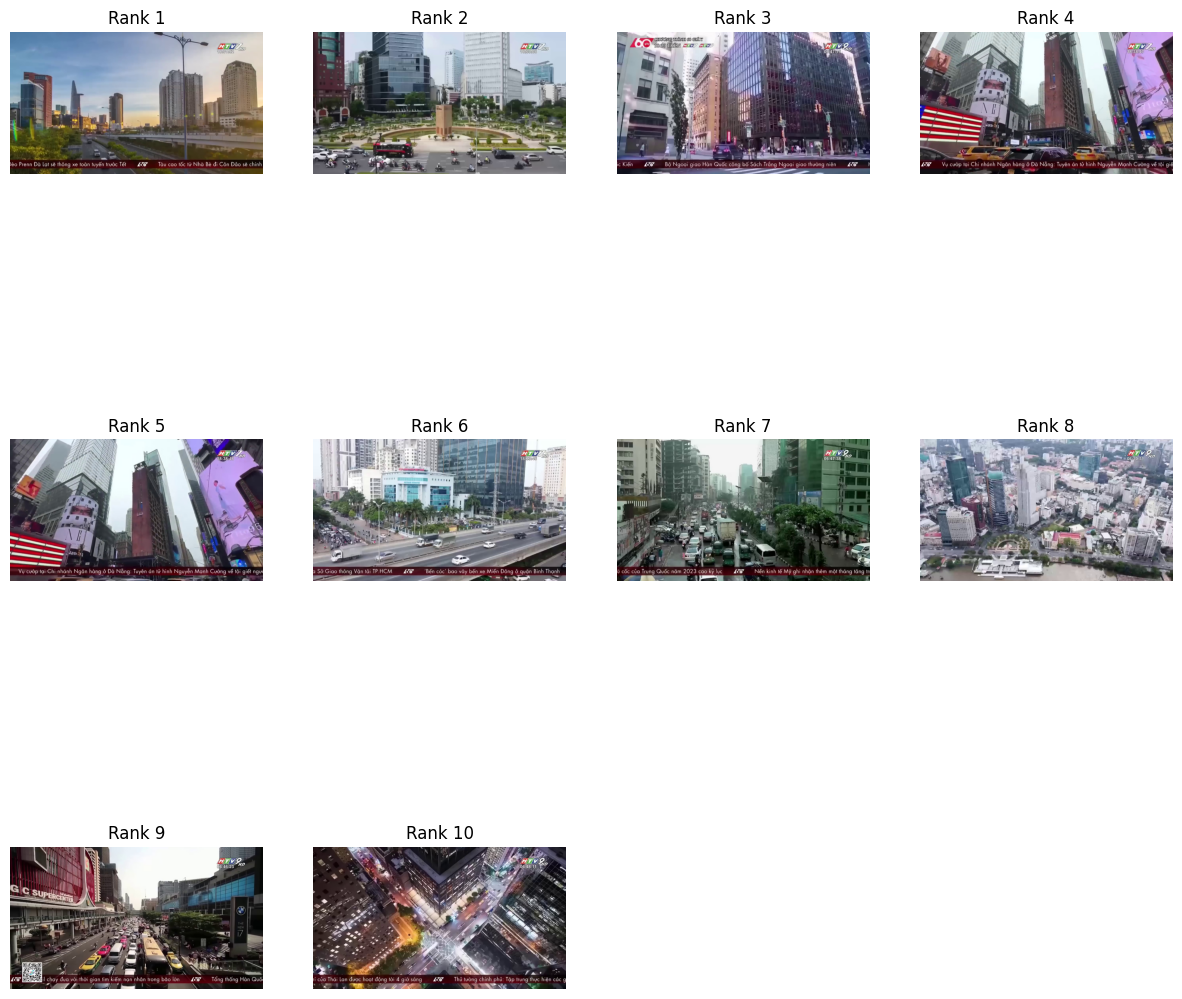

In [9]:
prompt = "modern urban cityscapes with skyscrapers and busy streets"
results = query_with_text(prompt, top_k=10)
# Example usage
plot_results(results, top_k=10, images_per_row=4)

torch.Size([1, 768])


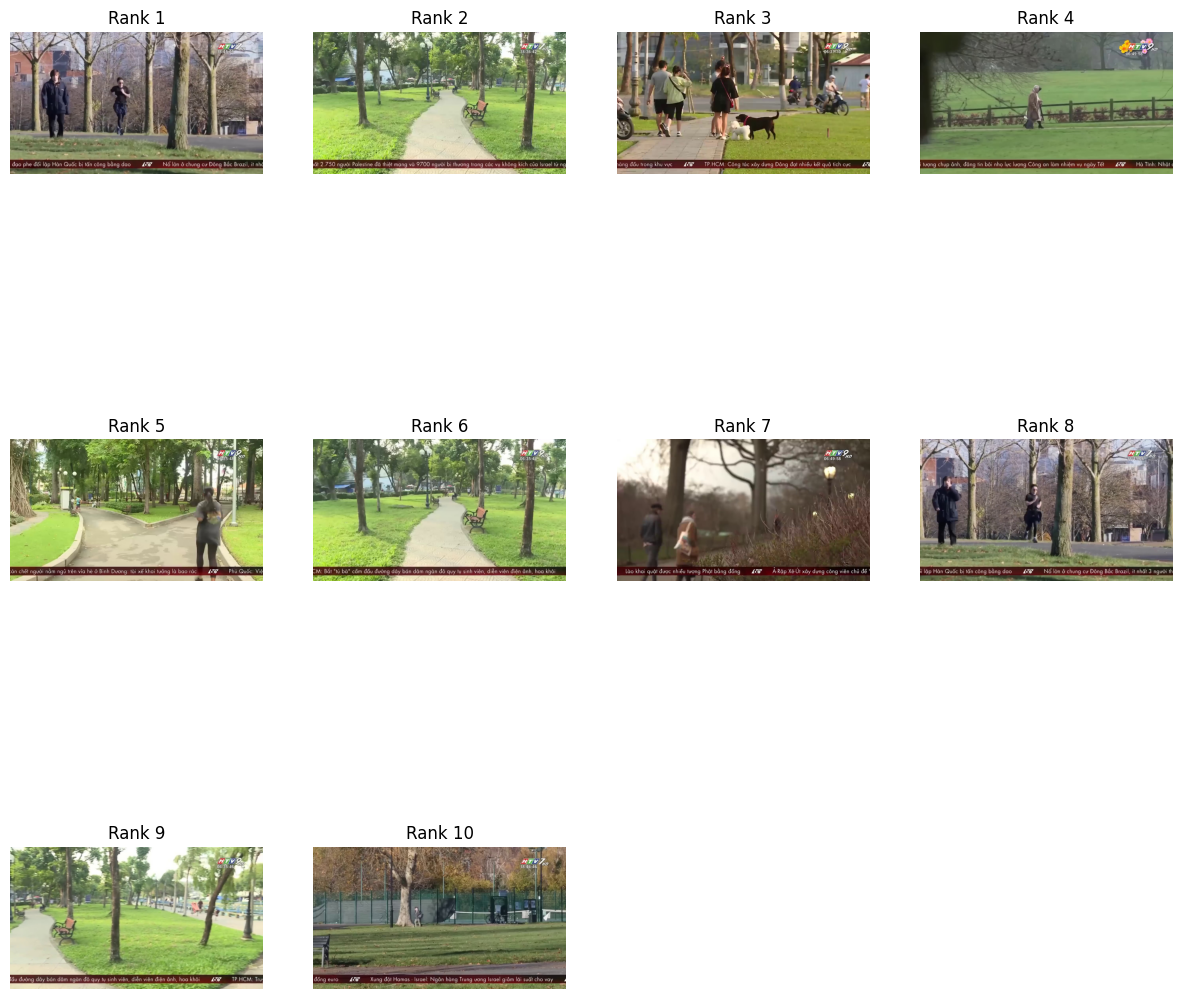

In [10]:
prompt = "walking in a park"
results = query_with_text(prompt, top_k=10)
# Example usage
plot_results(results, top_k=10, images_per_row=4)

torch.Size([1, 768])


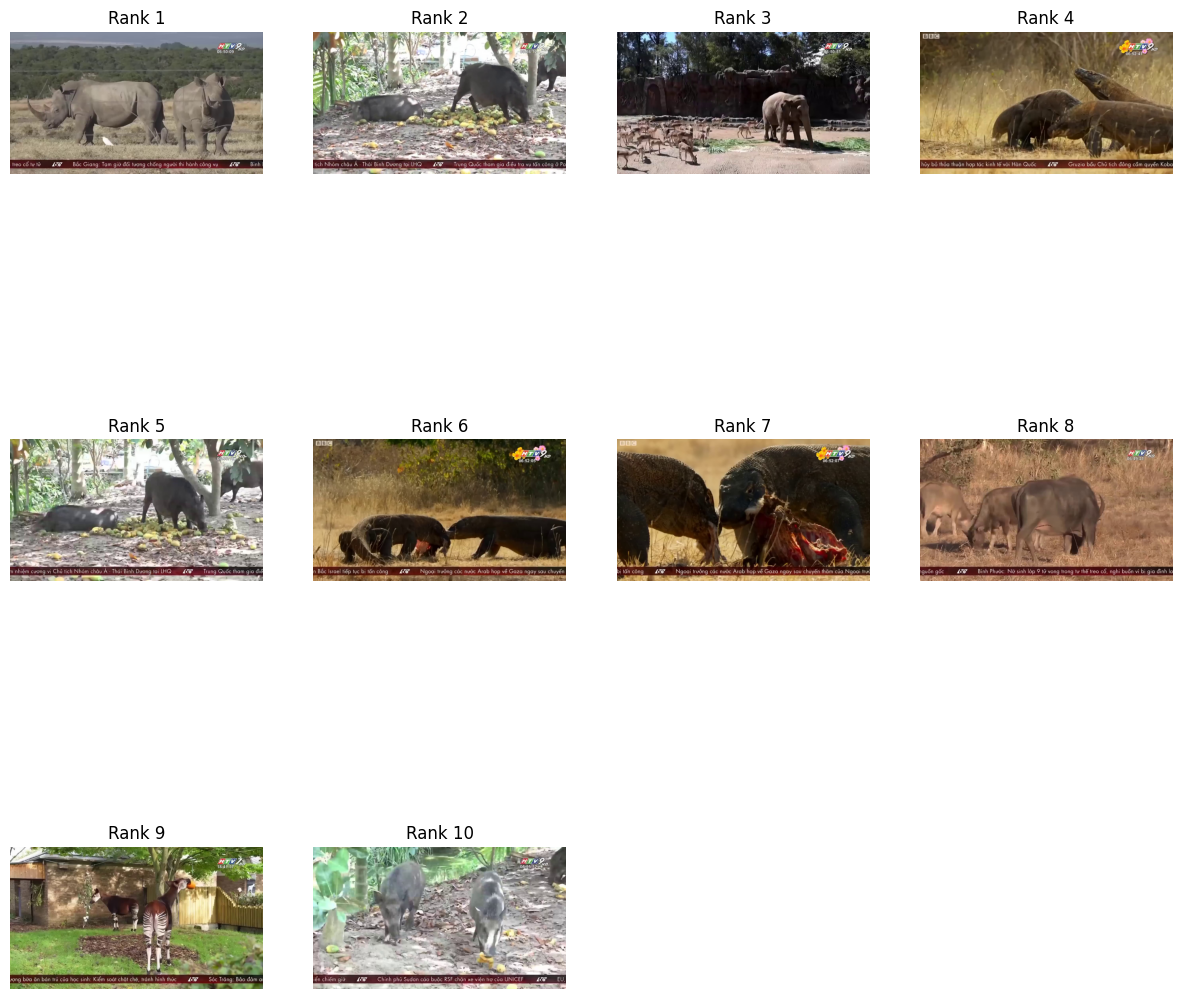

In [11]:
prompt = "exotic animals in their natural habitats"
results = query_with_text(prompt, top_k=10)
# Example usage
plot_results(results, top_k=10, images_per_row=4)